# QTW - Final - EDA

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline 

## Load Data

In [3]:
data = pd.read_csv('../final_project.csv')

In [4]:
data.head()

x0        x1         x2        x3        x4         x5         x6  \
0 -0.166563 -3.961588   4.621113  2.481908 -1.800135   0.804684   6.718751   
1 -0.149894 -0.585676  27.839856  4.152333  6.426802  -2.426943  40.477058   
2 -0.321707 -1.429819  12.251561  6.586874 -5.304647 -11.311090  17.812850   
3 -0.245594  5.076677 -24.149632  3.637307  6.505811   2.290224 -35.111751   
4 -0.273366  0.306326 -11.352593  1.676758  2.928441  -0.616824 -16.505817   

          x7        x8        x9  ...        x41       x42       x43  \
0 -14.789997 -1.040673 -4.204950  ...  -1.497117  5.414063 -2.325655   
1  -6.725709  0.896421  0.330165  ...  36.292790  4.490915  0.762561   
2  11.060572  5.325880 -2.632984  ...  -0.368491  9.088864 -0.689886   
3 -18.913592 -0.337041 -5.568076  ...  15.691546 -7.467775  2.940789   
4  27.532281  1.199715 -4.309105  ... -13.911297 -5.229937  1.783928   

        x44       x45        x46       x47       x48        x49  y  
0  1.674827 -0.264332  60.781427 -7.689696  0.151589  -8.040166  0  
1  6.526662  1.007927  15.805696 -4.896678 -0.320283  16.719974  0  
2 -2.731118  0.754200  30.856417 -7.428573 -2.090804  -7.869421  0  
3 -6.424112  0.419776 -72.424569  5.361375  1.806070  -7.670847  0  
4  3.957801 -0.096988 -14.085435 -0.208351 -0.894942  15.724742  1  

[5 rows x 51 columns]

## Boxplots

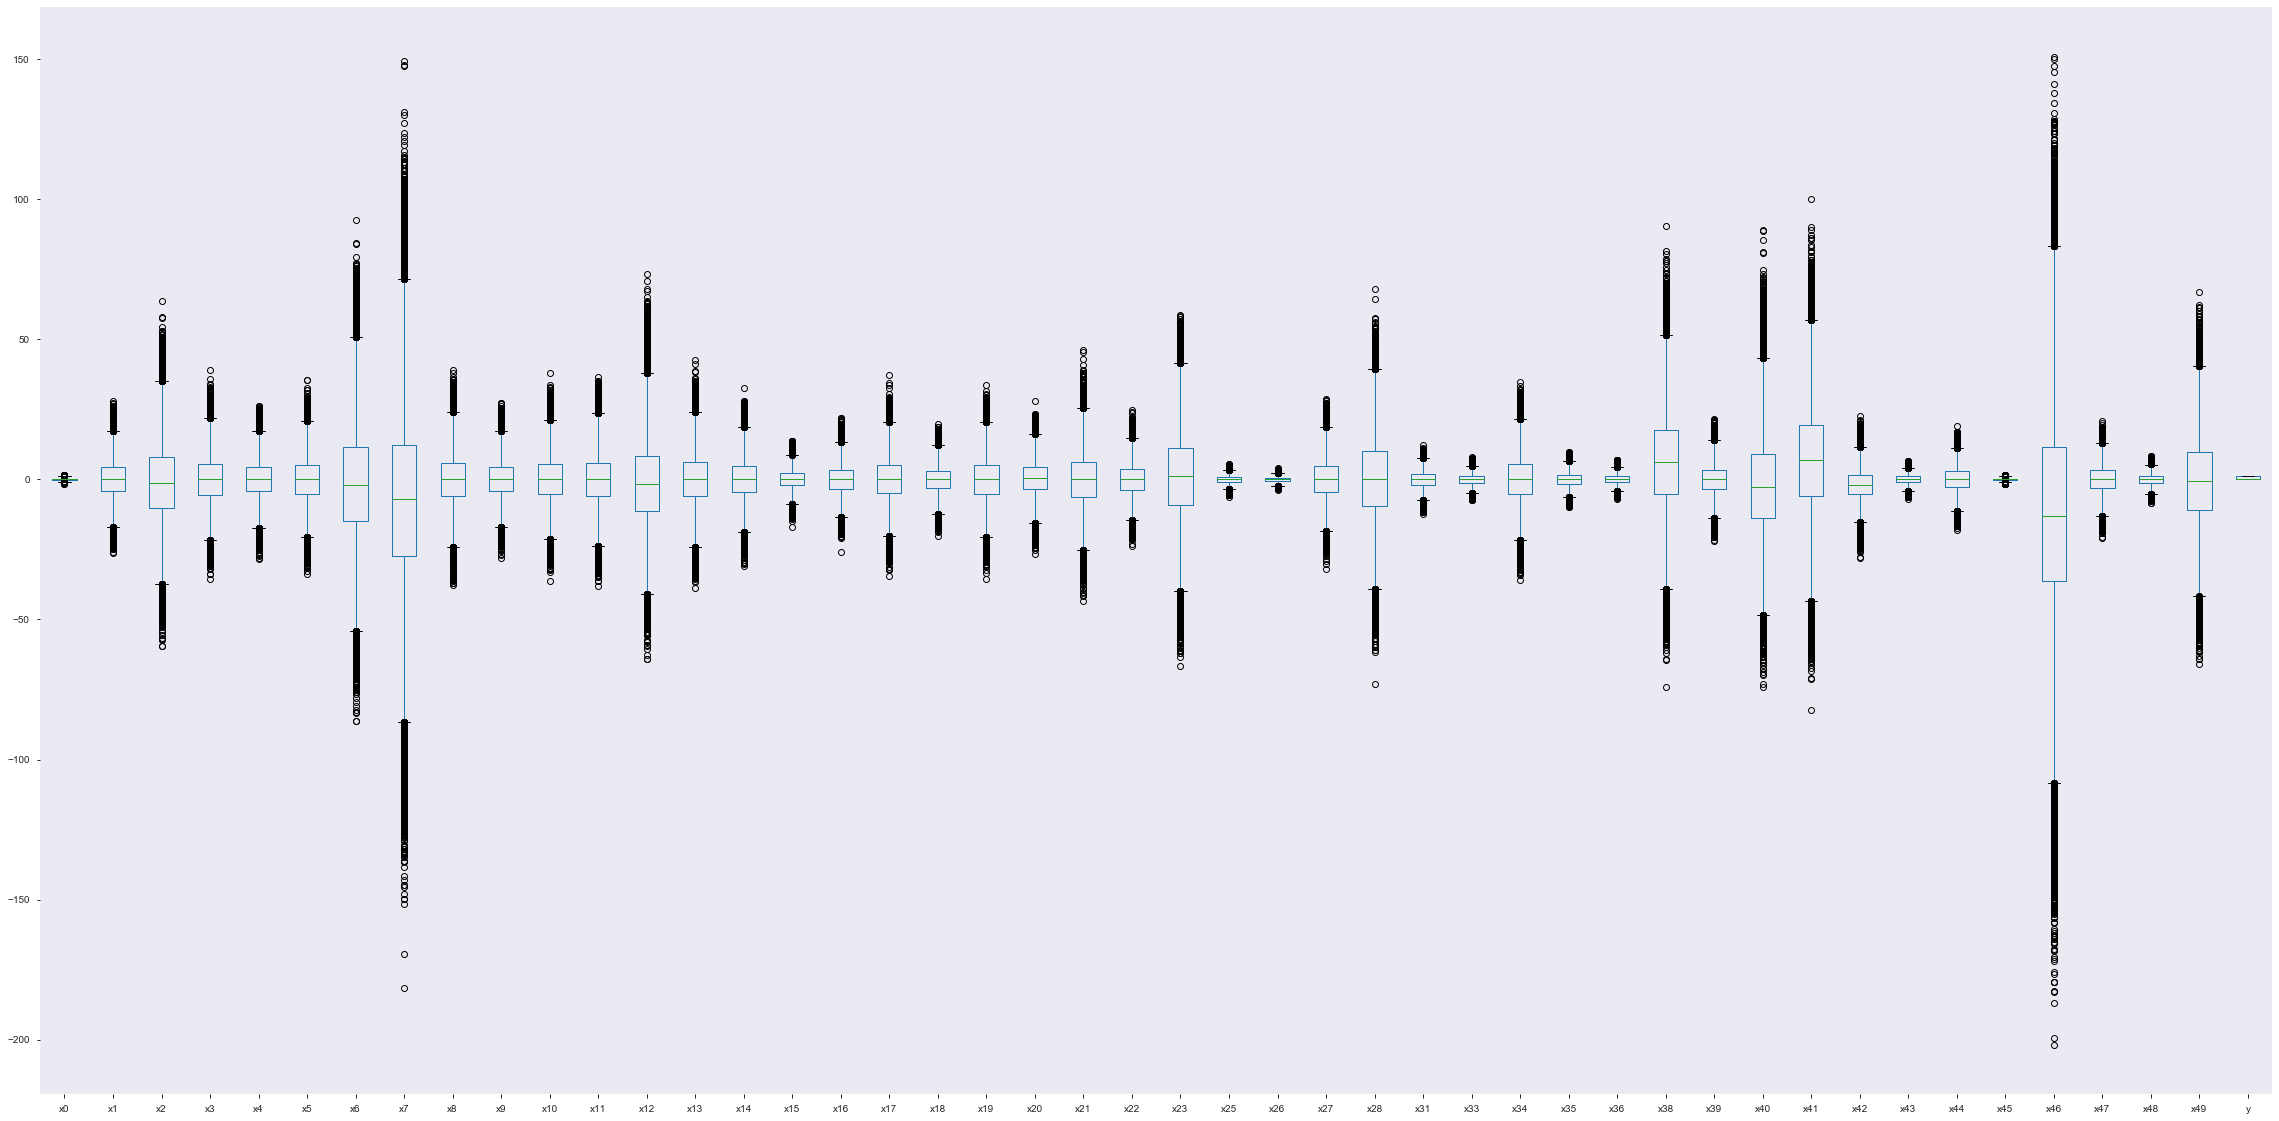

In [4]:
data.boxplot(grid = False,figsize=(40,20)) #figsize=(Width,Height)

## Boxplot By Y Attribute

In [5]:
data.y.unique()

array([0, 1], dtype=int64)

In [6]:
data_zero = data[data['y']== 0]
data_one = data[data['y']== 1]

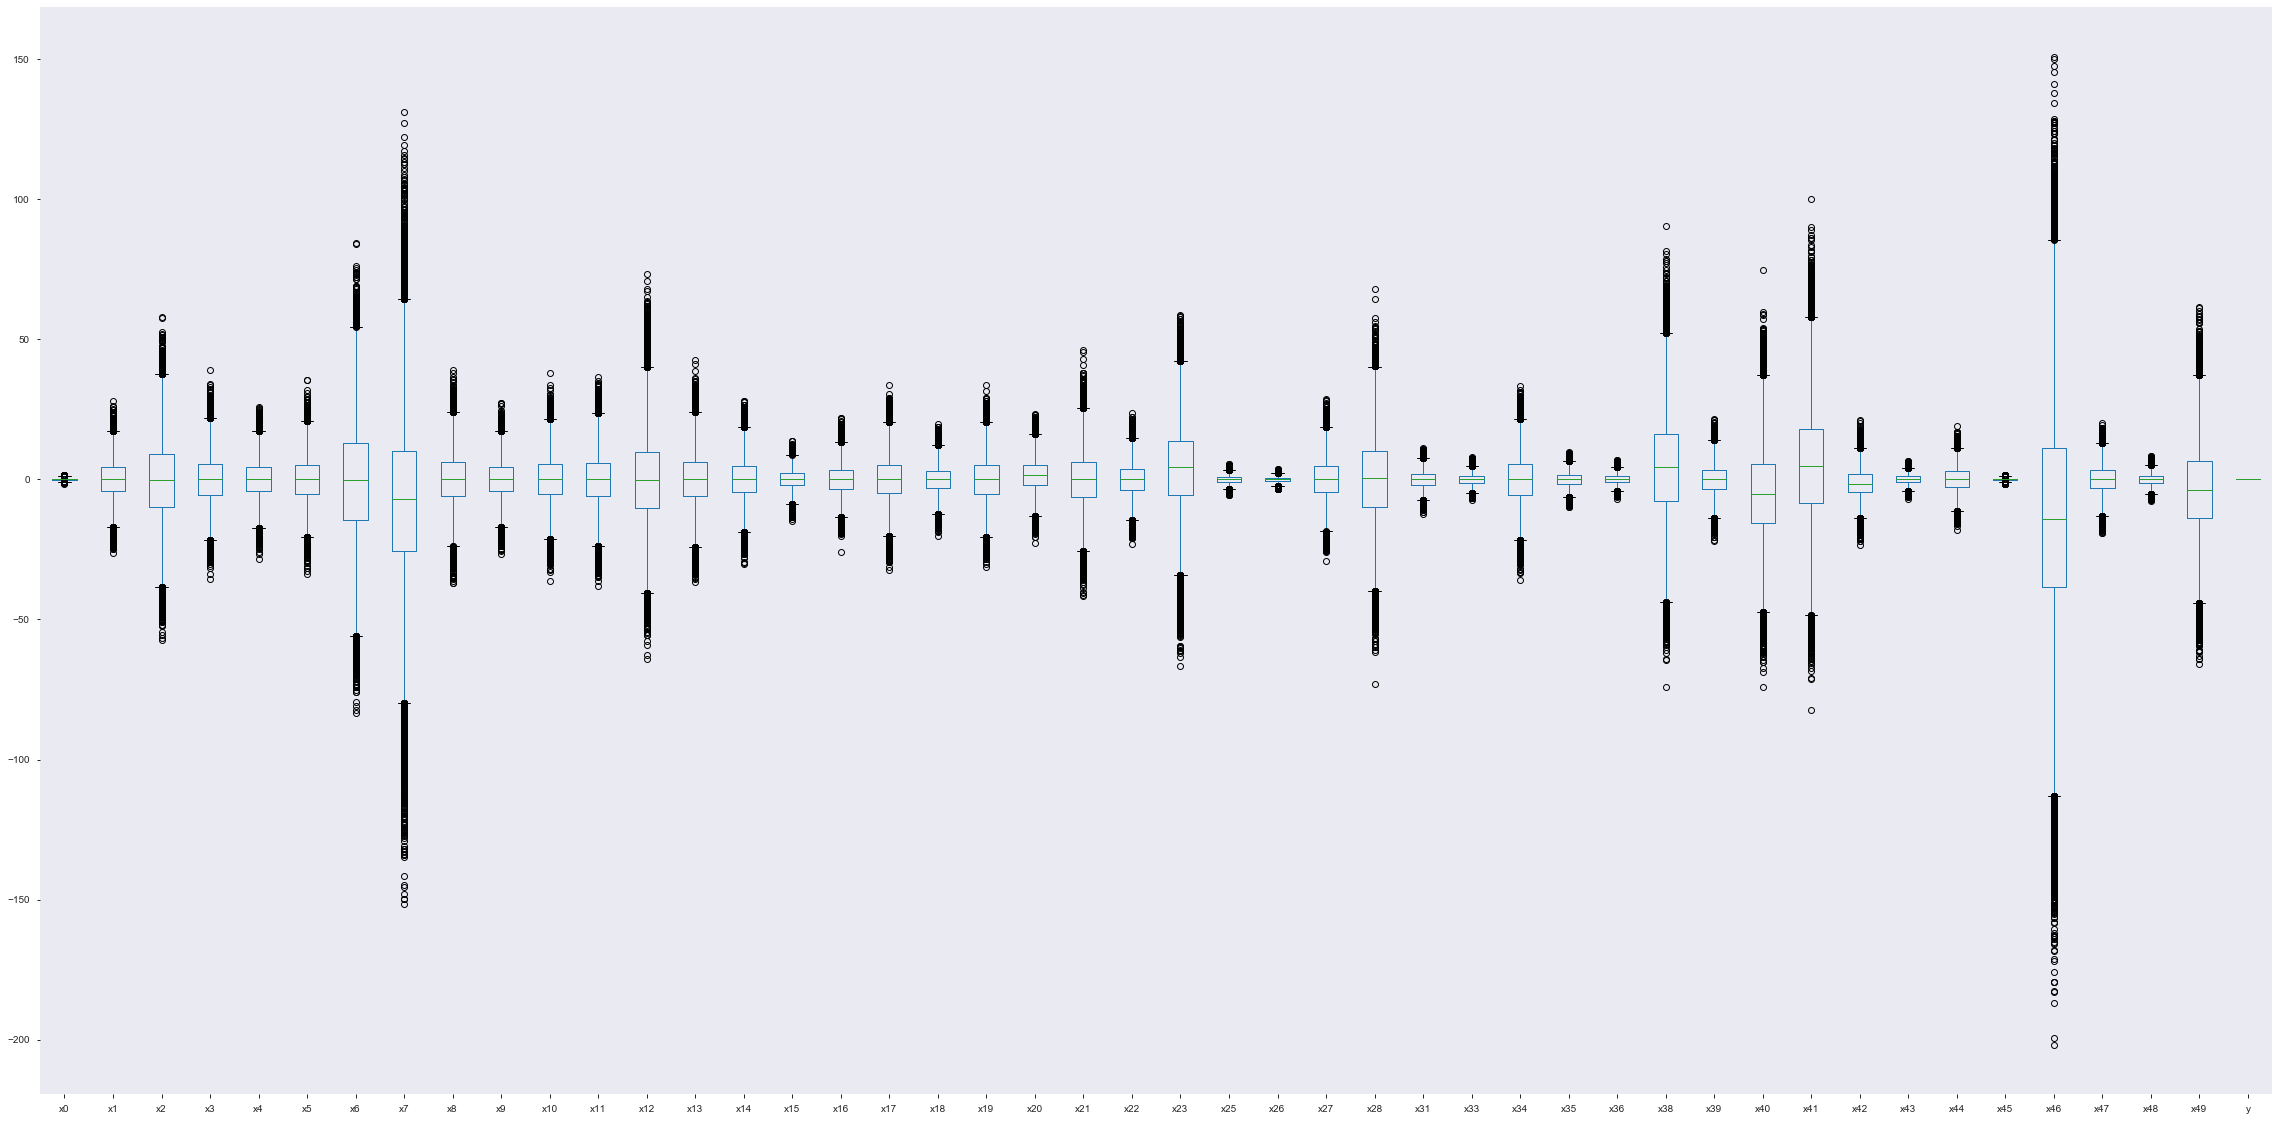

In [7]:
data_zero.boxplot(grid = False, figsize=(40,20)) #figsize=(Width,Height)

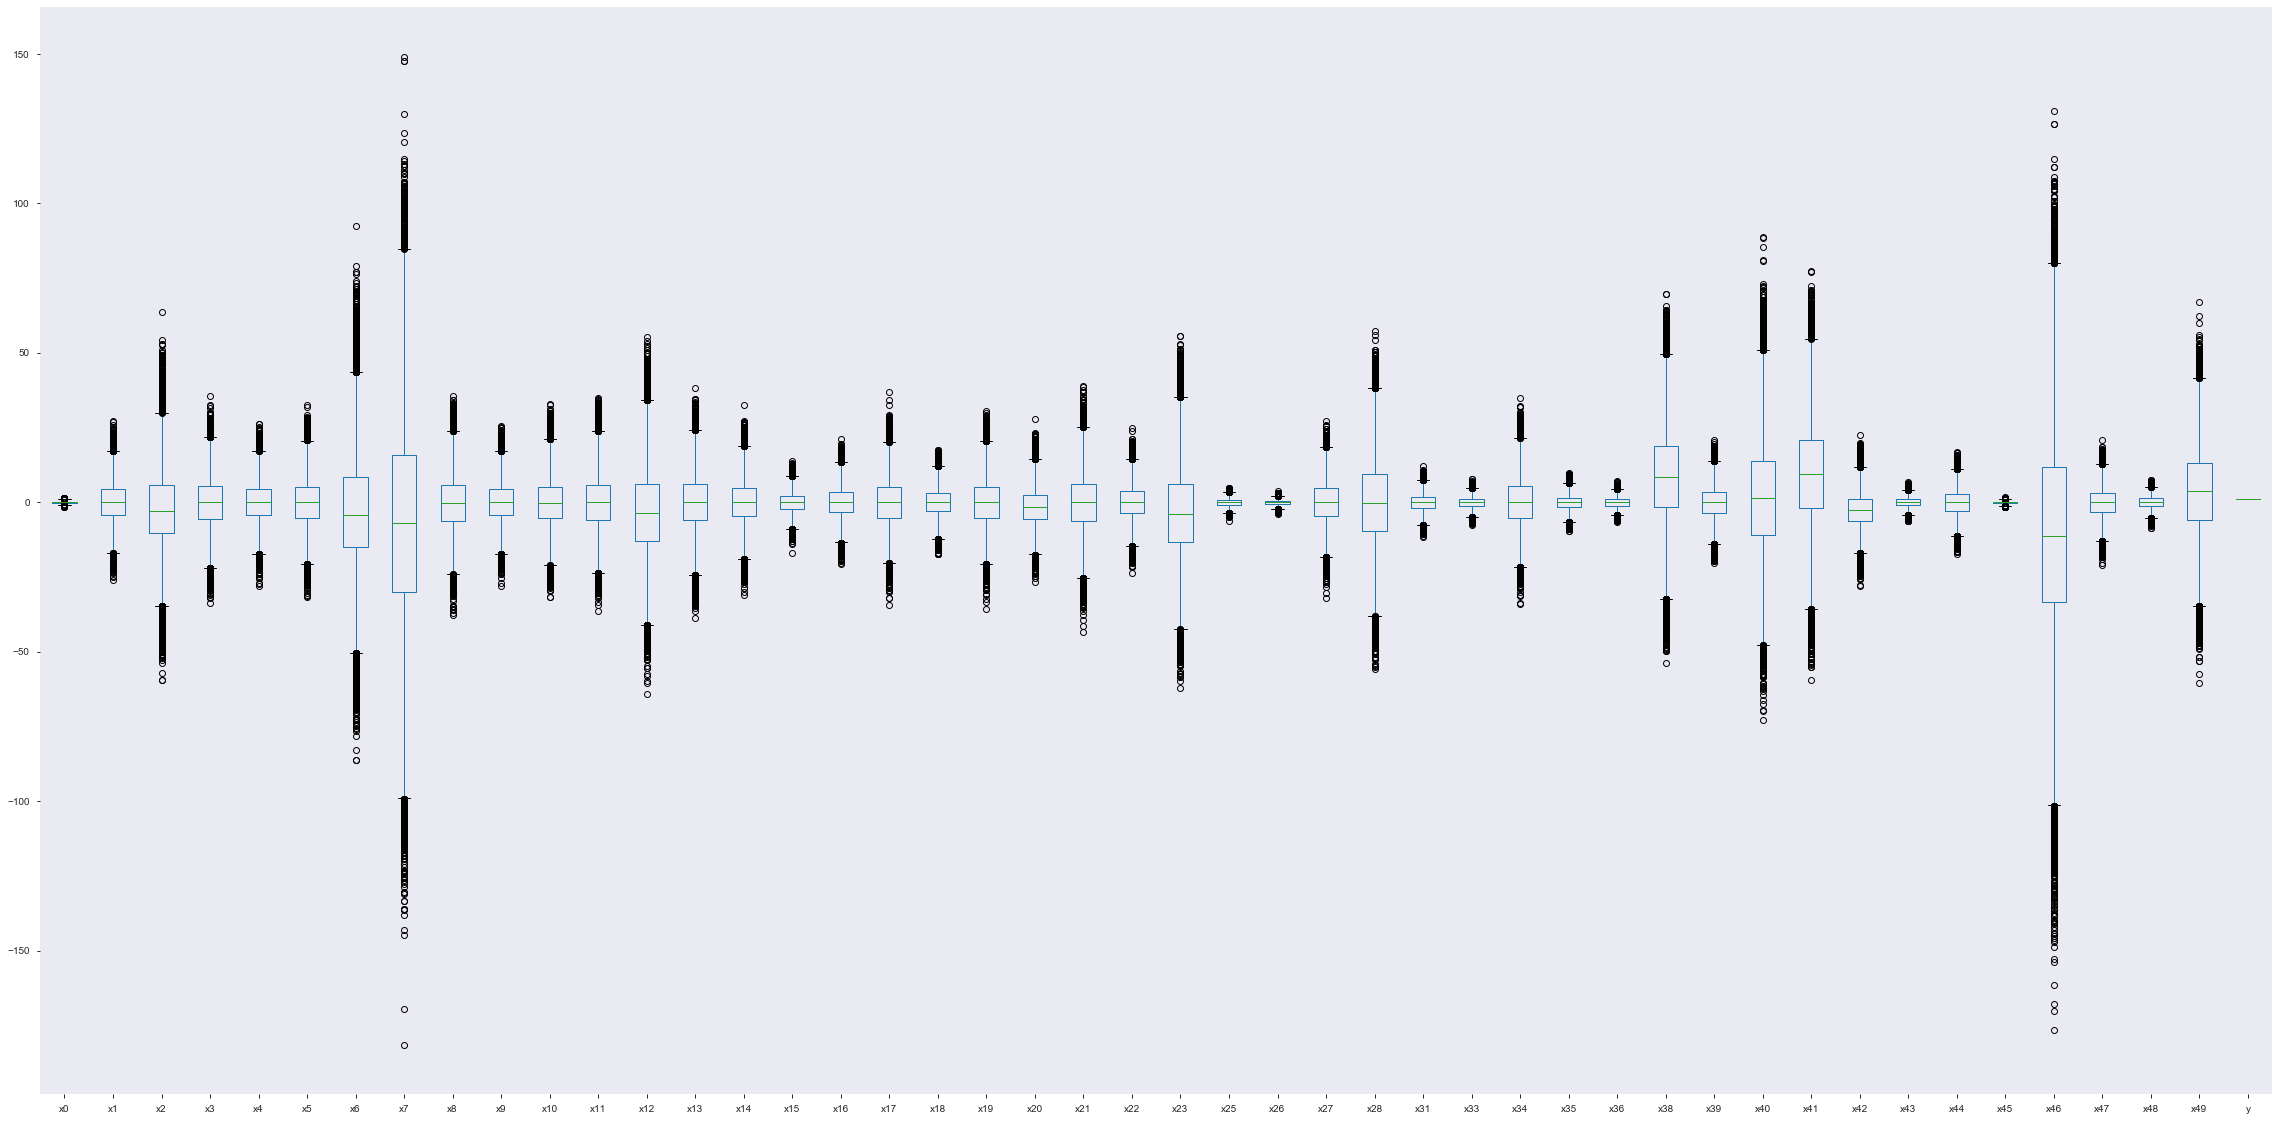

In [8]:
data_one.boxplot(grid = False, figsize=(40,20)) #figsize=(Width,Height)

## Pandas Profile data

In [9]:
profile = pandas_profiling.ProfileReport(data)

In [10]:
profile

## Attributes x24, x29, x30, x37

- Convert x24, x29, and x30 Datatype to Categorical 
- Rename Attribute:
    - x24 to Continent
    - x29 to Month
    - x30 to DayOfWeek
    - x37 to Money

In [5]:
data.x24 = data.x24.astype('category')
data.x29 = data.x29.astype('category')
data.x30 = data.x30.astype('category')
data.rename(columns={'x24': 'Continent', 'x29': 'Month', 'x30': 'DayOfWeek', 'x37': 'Money'}, inplace=True)

### Standerdize Continent

In [6]:
data['Continent'].unique().to_list()

['euorpe', 'asia', 'america', nan]

In [7]:
data['Continent'] = data['Continent'].apply(lambda x: x.replace('euorpe', 'Euorpe').replace('asia', 'Asia')\
                                            .replace('america', 'America'))

In [8]:
data['Continent'].unique().to_list()

['Euorpe', 'Asia', 'America', nan]

### Standardize Month Abbrevations

- Jan
- Feb
- Mar
- Apr
- May
- Jun
- Jul
- Aug
- Sep
- Oct
- Nov
- Dec

In [9]:
data.Month.unique().to_list()

['July',
 'Aug',
 'Jun',
 'May',
 'sept.',
 'Apr',
 'Nov',
 'Oct',
 nan,
 'Mar',
 'Feb',
 'Dev',
 'January']

In [10]:
data['Month'] = data['Month'].apply(lambda x: x.replace('January', 'Jan').replace('July', 'Jul').replace('sept.', 'Sep').replace('Dev','Dec'))

In [11]:
data.Month.unique().to_list()

['Jul',
 'Aug',
 'Jun',
 'May',
 'Sep',
 'Apr',
 'Nov',
 'Oct',
 nan,
 'Mar',
 'Feb',
 'Dec',
 'Jan']

### Standardize DayOfWeek Abbrevations

In [12]:
data.DayOfWeek.unique().to_list()

['tuesday', 'wednesday', 'thurday', 'monday', 'friday', nan]

In [13]:
data['DayOfWeek'] = data['DayOfWeek'].apply(lambda x: x.replace('monday', 'Mon').replace('tuesday', 'Tue').replace('wednesday', 'Wed')\
                                            .replace('thurday','Thu').replace('friday','Fri'))

In [14]:
data.DayOfWeek.unique().to_list()

['Tue', 'Wed', 'Thu', 'Mon', 'Fri', nan]

### Money Attribute

In [15]:
data['Money'] = data['Money'].astype('str')

In [16]:
data['Money'] = data['Money'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0           159974 non-null float64
x1           159975 non-null float64
x2           159962 non-null float64
x3           159963 non-null float64
x4           159974 non-null float64
x5           159963 non-null float64
x6           159974 non-null float64
x7           159973 non-null float64
x8           159979 non-null float64
x9           159970 non-null float64
x10          159957 non-null float64
x11          159970 non-null float64
x12          159964 non-null float64
x13          159969 non-null float64
x14          159966 non-null float64
x15          159965 non-null float64
x16          159974 non-null float64
x17          159973 non-null float64
x18          159960 non-null float64
x19          159965 non-null float64
x20          159962 non-null float64
x21          159971 non-null float64
x22          159973 non-null float64
x23          159953 non-null float64
C

In [18]:
data.to_csv('../final_project_mod.csv', index=False)